In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据文件
df = pd.read_csv('/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv')
print(df.head(3))
# 分析房屋的’RM’， ‘LSTAT’，'CRIM’ 特征与MEDV的相关性性，所以，将其余不相关特征移除
boston_df = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt', 'Price']]

# 对非数值型特征进行独热编码
boston_df_encoded = pd.get_dummies(boston_df, columns=['Neighborhood'])

   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076


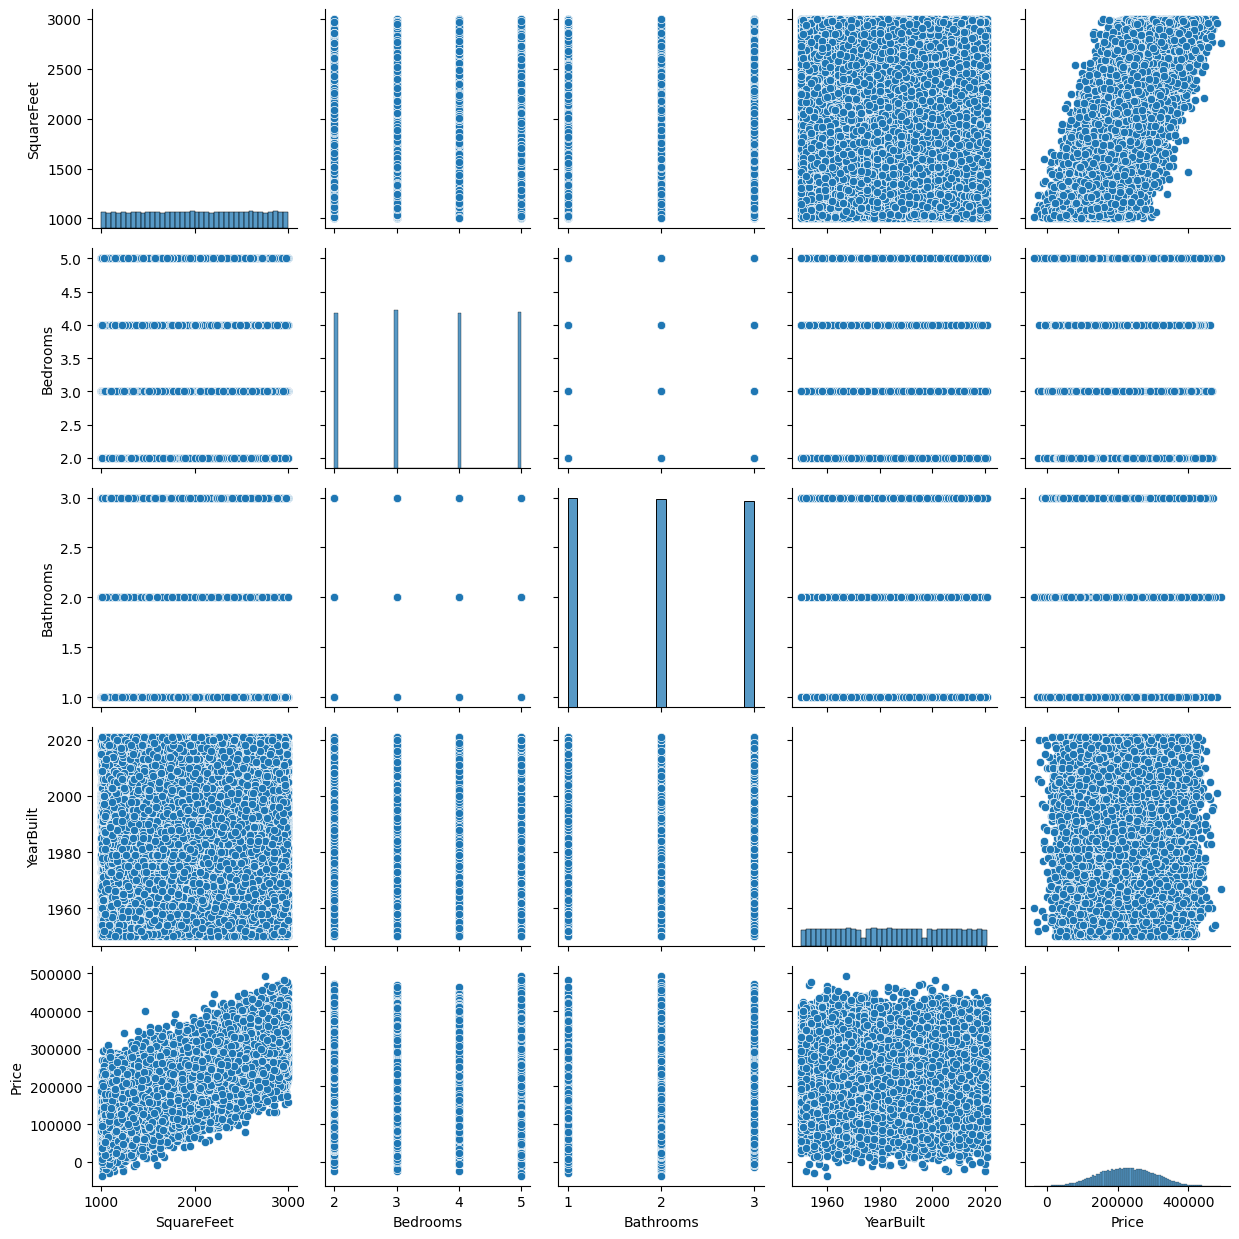

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(boston_df, height=2.5)

plt.tight_layout()
plt.show()

SquareFeet               int64
Bedrooms                 int64
Bathrooms                int64
YearBuilt                int64
Price                  float64
Neighborhood_Rural        bool
Neighborhood_Suburb       bool
Neighborhood_Urban        bool
dtype: object


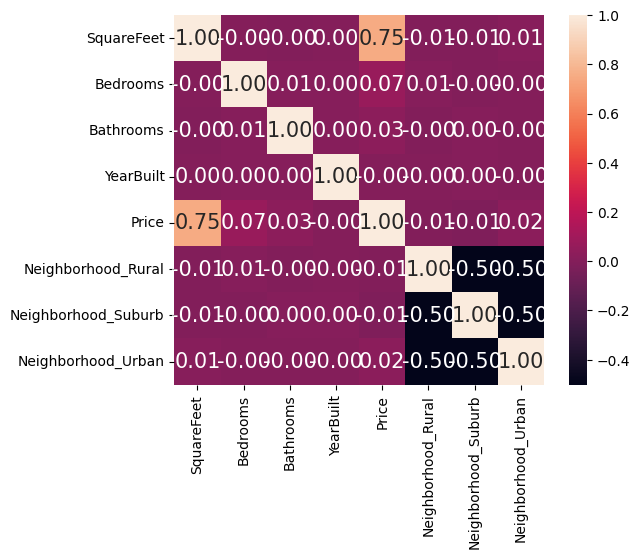

In [82]:
# 绘制关联矩阵
import numpy as np
print(boston_df_encoded.dtypes)
# 获取列名
cols = boston_df_encoded.columns
# 将DataFrame的值转换为numpy数组，确保数据类型为float64
cm = np.corrcoef(boston_df_encoded.values.astype(np.float64).T)
#  cbar=True 表示显示颜色条，square=True 表示将热力图的宽高设置为相等，annot_kws={'size':15} 表示热力图上的数值字体大小为15
hm = sns.heatmap(cm, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [83]:
# 这里选择 SquareFeet 与 Price 两个特征建立随机森林回归模型。

In [84]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X = df['SquareFeet'].values.reshape(-1, 1)
y = df['Price'].values

print ("样本数据量:%d, 特征个数：%d" % X.shape)
print ("target样本数据量:%d" % y.shape[0])

#70%用于训练，30%用于测试
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn import preprocessing
# 初始化标准化器
min_max_scaler = preprocessing.MinMaxScaler()
# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = min_max_scaler.fit_transform(X_train)
y_train = min_max_scaler.fit_transform(y_train.reshape(-1,1)) # reshape(-1,1)指将它转化为1列，行自动确定
X_test = min_max_scaler.fit_transform(X_test)
y_test = min_max_scaler.fit_transform(y_test.reshape(-1,1))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

样本数据量:50000, 特征个数：1
target样本数据量:50000
(40000, 1) (10000, 1) (40000, 1) (10000, 1)


In [85]:
# 建立随机森林回归模型
# RandomForestRegressor 是 scikit-learn 中的一个类，用于构建随机森林回归模型。
# n_estimators=1000 表示选择构建包含 1000 棵树的随机森林。
# criterion='squared_error' 表示用均方误差（MSE）作为切分标准来构建每棵决策树。
# random_state=1 设置了随机种子，以确保模型在不同运行之间是可重复的。
# n_jobs=-1 表示并行计算，加速训练过程。
forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)
# 模型训练
forest.fit(X_train,y_train)


# 使用测试数据进行预测
y_test_pred = forest.predict(X_test)
print('y_test_pred : ', y_test_pred)
# 训使用测试数据进行预测
y_train_pred = forest.predict(X_train)
print('y_train_pred : ', y_train_pred)

/tmp/ipykernel_47/2020027823.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


y_test_pred :  [0.45071137 0.46992443 0.31458183 ... 0.59416302 0.65796446 0.54457884]
y_train_pred :  [0.60407736 0.49899763 0.59479058 ... 0.55615447 0.37834376 0.55292061]


In [86]:
# 模型性能评估
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("mse_test={:.2f} mae_test={:.2f} r2_test={:.2f}".format(mse_test,mae_test, r2_test))

mse_test=0.01 mae_test=0.08 r2_test=0.53


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


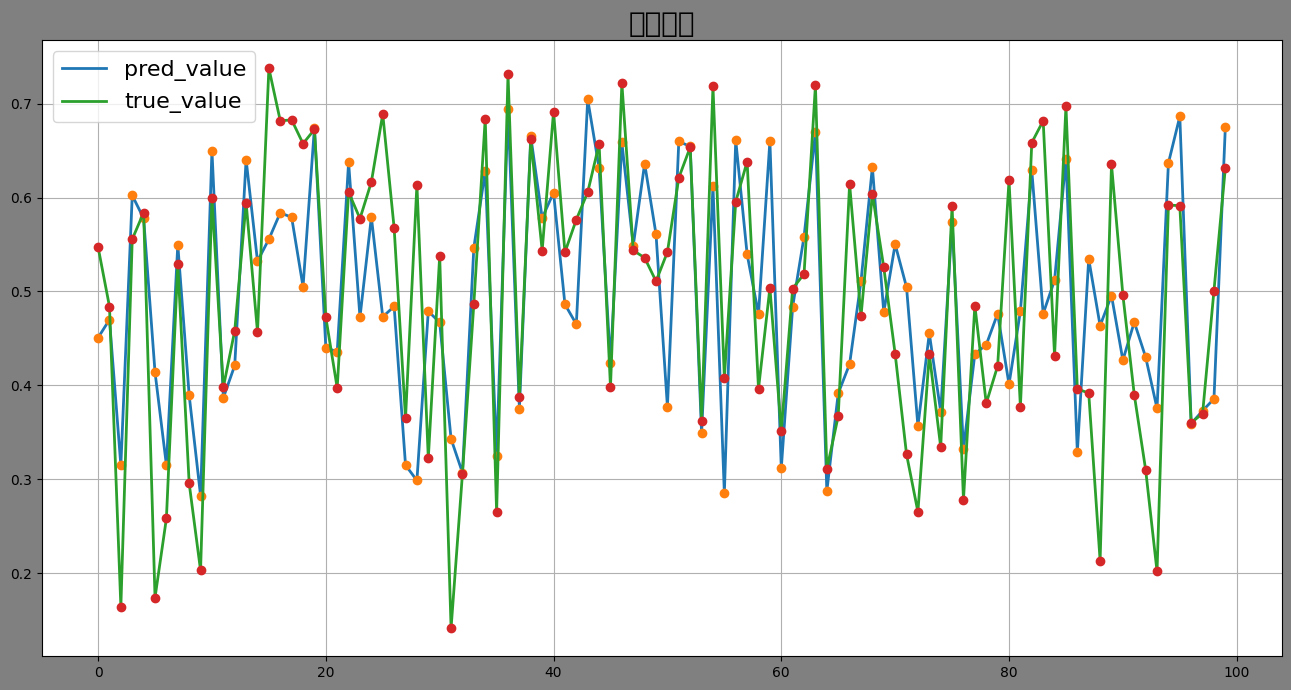

In [87]:
# 绘图函数
def figure(title, *datalist):
    plt.figure(facecolor='gray', figsize=[16, 8])
    for v in datalist:
        plt.plot(v[0], '-', label=v[1], linewidth=2)
        plt.plot(v[0], 'o')
    plt.grid()
    plt.title(title, fontsize=20)
    plt.legend(fontsize=16)
    plt.show()

figure('预测结果', [y_test_pred[:100], 'pred_value'], [y_test[:100], 'true_value'])